<a href="https://colab.research.google.com/github/mirairo/2013.6.21-/blob/master/20201123%EC%9D%B4%EC%A2%85%EA%B8%B0%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9Dp49_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chipotle 데이터셋의 기초 정보 살펴보기


In [1]:
import pandas as pd

# present workspace folder 탐색하기


In [2]:
pwd

'/content'

# '/content'폴더 하위에 data 폴더 신규 생성한 후 분석 파일 저장하기(분석 실행 후 자동삭제 확인)

In [3]:
file_path = './data/chipotle.tsv'

# read_csv()함수로 데이터를 데이터 프레임 형태로 부르기

chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape)
print("------------------------------------------------------")
print(chipo.info())

(4622, 5)
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


# chipotle 데이터셋의 행과 열, 데이터 세부 확인하기

In [4]:
# chipo라는 데이터 프레임에서 순서대로 10개의 데이터 보기
chipo.head(10)
print(chipo.columns)
print("---------------------------------------------------------------------------")



Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
---------------------------------------------------------------------------


In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


# describe() 함수로 기초통계량 출력하기

In [7]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 반환됨
chipo['order_id']=  chipo['order_id'].astype(str)
print(chipo.describe())
# chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인함

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


# unique() 함수로 범주형 피처의 개수 출력하기

In [8]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))


1834
50


# 2 단계 : 데이터 탐색과 발견하기(가장 많이 주문한 아이템 TOP 10 출력하기)

In [13]:
# 가장 많이 주문한 아이템 TOP 10 출력하기
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
  print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


# 그룹(아이템)별 주문 개수와 총량 구하기

In [14]:
# 그룹별 주문 개수와 총량 구하기
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:30] # 아이템별 주문 개수 구하기

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [15]:
# 아이템별 주문 총량을 계산하기
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # 아이템별 주문 총량을 출력하기

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

# 시각화로 분석 결과 살펴보기

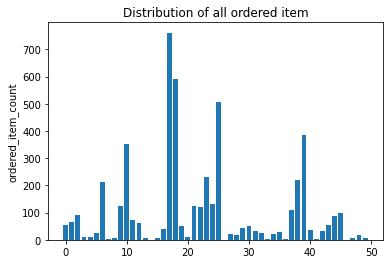

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = "center")
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

# 3 단계 : 데이터 전처리 하기(전처리 함수 사용하기)

In [17]:
# item_price 피터 살펴보기
print(chipo.info())
print('----------------------------------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
----------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

# apply()와 lambda 함수를 이용한 데이터 전처리

In [19]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()


,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


# 4 단계 : 탐색적 데이터 분석하기 (데이터와 스무고개 놀이하기)

In [20]:
# 주문당 평균 금액 출력하기
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

# 한 주문에 10달러 이상 지불한 주문 번호(order_id) 출력하기

In [21]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']
